Kolone u datasetu:
 Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

Prvih 5 redova:
     loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


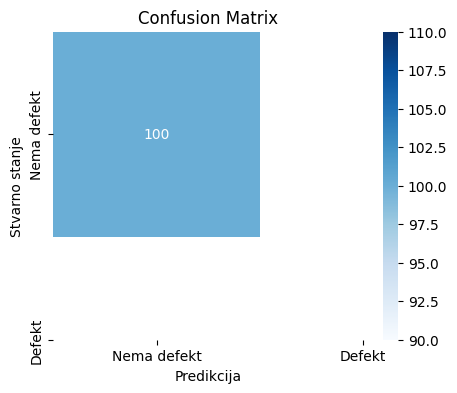

In [ ]:
# Import biblioteka
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Učitaj dataset (ako si ga uploadovala u Colab)
data = pd.read_csv("cm1.csv")

# Pogledaj kolone da pronađeš target
print("Kolone u datasetu:\n", data.columns)
print("\nPrvih 5 redova:\n", data.head())

# Ako se target zove 'defects' ili 'class', normalizuj ga
if 'defects' in data.columns:
    target_col = 'defects'
elif 'class' in data.columns:
    target_col = 'class'
else:
    raise ValueError("Ne mogu naći target kolonu (defects ili class)")

# Pretvori target u brojeve (0 = nema defekta, 1 = defekt)
data[target_col] = data[target_col].map({'true':1, 'false':0, 'True':1, 'False':0})
data[target_col] = data[target_col].fillna(0).astype(int)

# Ulazne osobine (X) i ciljna varijabla (y)
X = data.drop(columns=[target_col])
y = data[target_col]

# Podjela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pravljenje i treniranje modela
model = GaussianNB()
model.fit(X_train, y_train)

# Predikcija
y_pred = model.predict(X_test)

# Rezultati
print("Confusion matrix (brojevi):\n", confusion_matrix(y_test, y_pred))
print("\nIzvještaj o performansama:\n", classification_report(y_test, y_pred))

# Prikaz confusion matrice
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Nema defekt", "Defekt"],
            yticklabels=["Nema defekt", "Defekt"])
plt.xlabel("Predikcija")
plt.ylabel("Stvarno stanje")
plt.title("Confusion Matrix")
plt.show()
